/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (9,19) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


step1: self.dataframe.columns: Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')
overall_preproc_operations target_tag: best_of
Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'w

self.dataframe after normalizing_numerical variables         draw_size  match_num  winner_ht  winner_age  winner_rank  \
77000    0.225806   0.000000   0.333333    0.230329     0.020605   
77001    0.225806   0.003145   0.377778    0.440509     0.283323   
77002    0.225806   0.006289   0.111111    0.268399     0.133290   
77003    0.225806   0.009434   0.444444    0.288229     0.090792   
77004    0.225806   0.012579   0.222222    0.221527     0.029620   
77005    0.225806   0.015723   0.377778    0.405832     0.079202   
77006    0.225806   0.018868   0.600000    0.318558     0.121056   
77007    0.225806   0.022013   0.266667    0.208165     0.032196   
77008    0.225806   0.025157   0.488889    0.369141     0.068899   
77009    0.225806   0.028302   0.444444    0.282927     0.092724   
77010    0.225806   0.031447   0.488889    0.448356     0.094656   
77011    0.225806   0.034591   0.600000    0.172110     0.027044   
77012    0.225806   0.037736   0.600000    0.212195     0.07340

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:647: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:648: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:651: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perfor

RFC prediction: [0 0 0 ... 1 1 0]
RFC conf_mat:
 [[5658 3588]
 [4579 6847]]


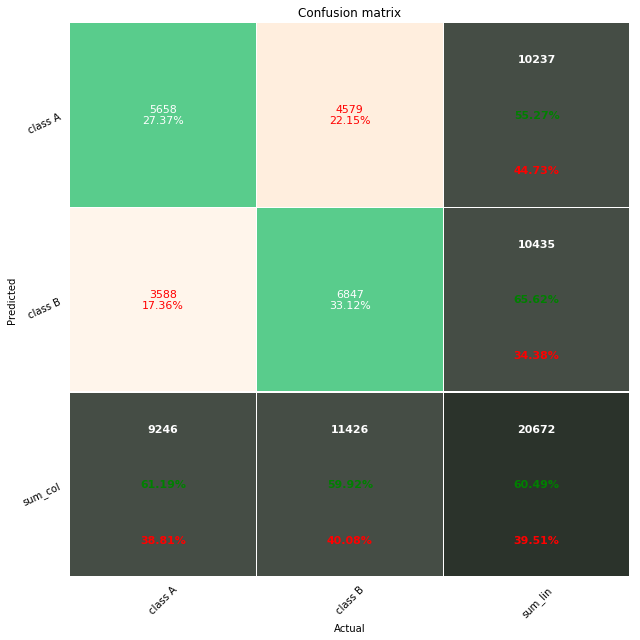

RFC F1-score 0.6049245356037152
XGB conf_mat:
 [[5536 3710]
 [4411 7015]]


/home/michael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


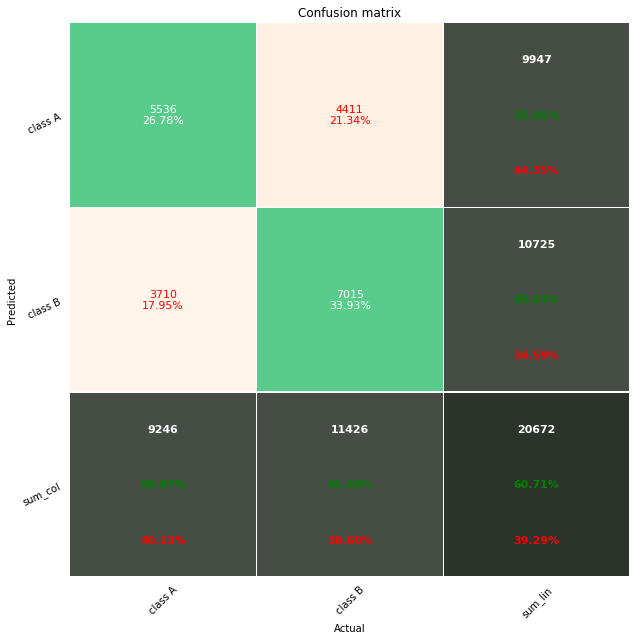

Accuracy: 60.71%
MLP conf_mat:
 [[5501 3745]
 [4480 6946]]


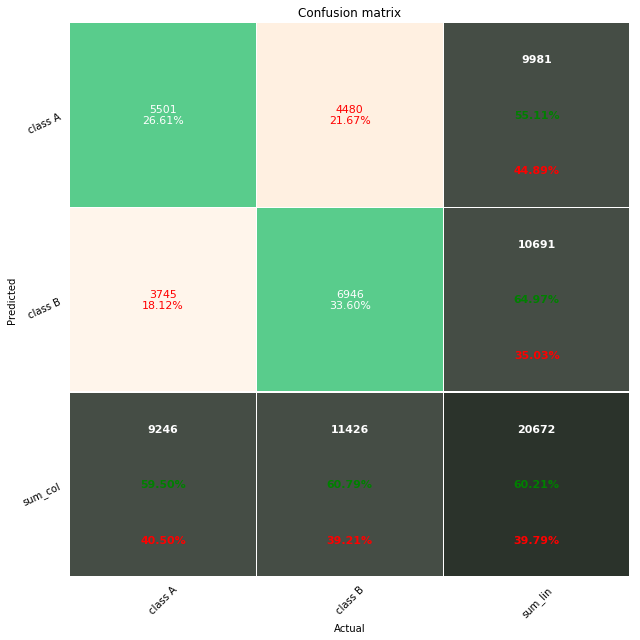

MLP F1-score 0.6021188080495357
cv_scores [0.57885471 0.60153566]


In [5]:
'''
Linear Regression Models for regression and classification problems

Move Tree part to aoter notbook

OVERALL SOFTWARE ARCHITECTURE:
1- pre_proc_lib
2- ML_linear_models
3- ML_treebased_models
4- DL_models
5- ML_analysis_operations_pipeline

TOY DATASETS
https://scikit-learn.org/stable/datasets/index.html

MACHINE LEARNING
https://scikit-learn.org/stable/supervised_learning.html
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

DIFFICULTIES
1- Missing values
2- Imbalanced dataset
'''
class MLmodels():
    '''
    Top base model for ML subseq
    '''
    def __init__(self, XTrain, XTest, yTrain, yTest):
        '''
        X,yTrain and X,yTest come from pre_proc_lib applied on dataset
        '''
        self.XTrain = XTrain
        self.XTest = XTest
        self.yTrain = yTrain
        self.yTest = yTest

#/////////////////////////////////////////
class TreeBasedModels(MLmodels):
    '''
    Purpose: combine pre_proc_lib and tree_based_models_lib:
    '''
    NUMBER_ESTIMATORS = 40
    LEARN_RATE = 0.01
    SUB_SAMPLE = 0.8
    MAX_DEPTH = 4
    LOSS_FUNCTION = 'ls'
    
    def __init__(self, XTrain, XTest, yTrain, yTest):
        super(TreeBasedModels, self).__init__(XTrain, XTest, yTrain, yTest)
        self.class_model = 'tree-based-models'
        
        
class GradientBoostedRegressor(TreeBasedModels):
    '''
    class to manage gradient tree boosted operations
    '''
    def __init__(self, xTrain, xTest, yTrain, yTest):
        self.GBMModel = None
        self.GBMModelFit = None
        self.mse_list = []
        self.normalFeatureImportances = None
        self.target_predictions = None
        print('GradientBoostReg yTrain: %s'%str(self.yTrain))
    
    def gradient_boosting_regressor(self):
        '''
        Model digest:       
        Call:  GradientBoostReg(xTrain, xTest, yTrain, yTest).gradient_boosting_regressor(self.xTrain, xTest, yTrain, yTest)
        Unittest methods with basic hand-made dataset
        '''
        from sklearn import ensemble

        # parametrize GBR model
        self.GBMModel = ensemble.GradientBoostingRegressor(n_estimators=self.NUMBER_ESTIMATORS,
                                                      max_depth=self.MAX_DEPTH,
                                                      learning_rate=self.LEARN_RATE,
                                                      subsample=self.SUB_SAMPLE,
                                                      loss=self.LOSS_FUNCTION)
        
        # train model by fitting it on train data and target
        self.GBMModel.fit(self.xTrain, self.yTrain) #still features non float format issue
    
    def compute_mse_list(self):
        ''' 
        Compute MSE on test set
        Dependency : gradient_boosting_regressor
        '''
        from sklearn.metrics import mean_squared_error
        trained_ml_model = self.GBMModel

        best_of_sets_predictions = trained_ml_model.staged_predict(self.xTest) #check method staged_predict in model

        self.target_predictions = np.around(self.GBMModel.predict(xTest))
        
        for predic in best_of_sets_predictions:
            self.mse_list.append(mean_squared_error(self.yTest,predic))

        print("MSE for model:")
        print("MSE min value: %s"%str(min(self.mse_list)))
        print("optimal number of trees: %s"%str(self.mse_list.index(min(self.mse_list))))

    def normalize_feature_importances(self):
        '''
        Dependency : compute_mse_list
        '''
        print('GBMModel.feature_importances_ %s'%str(self.GBMModel.feature_importances_))
        
        featureImportance = GBMInstance.GBMModel.feature_importances_

        # Normalize feature importances by max(feature_importance)
        self.normalFeatureImportances = featureImportance/featureImportance.max()
        
    def plot_train_test_errors(self):
        '''
        Plot training and test errors vs number of trees in ensemble
        Dependency : compute_mse_list
        '''
        # GBMInstance.plot_train_test_errors()
        plt.figure()
        plt.plot(range(1, self.numberEstimators + 1),
                 GBMInstance.GBMModel.train_score_,
                 label='Training Set MSE')

        plt.plot(range(1, self.numberEstimators + 1),
                 GBMInstance.mse_list,
                 label='Test Set MSE')

        plt.legend(loc='upper right')
        plt.xlabel('Number of Trees in ensemble')
        plt.ylabel('Mean Squared Error')
        plt.show()
       
    def plot_feature_importance(self):
        ''' Plot Feature Importance '''
        self.normalize_feature_importances()
        
        # sort them by ascending order
        indexes_sorted_FI = np.argsort(self.normalFeatureImportances)
        barPos = np.arange(indexes_sorted_FI.shape[0]) + .5
        plt.barh(barPos, GBMInstance.normalFeatureImportances[indexes_sorted_FI], align='center')
        plt.yticks(barPos, data_best_of.columns[indexes_sorted_FI])
        plt.xlabel('Feature Importance')
        plt.show()

        print('list of variable importances by increasing order: ')
        for feature_name in data_best_of.columns[indexes_sorted_FI]:
            print(feature_name)

            
# Random Forest classifier
class RandomForestClassifier(TreeBasedModels):
    '''
    Purpose: model used for asessing feature importance
    Reference: https://www.programcreek.com/python/example/83260/sklearn.ensemble.GradientBoostingClassifier
    Called by: OverallTreeBasedFeatureImportance
    gbc_model =  GradientBoostedClassifer(XTrain, Xtest, yTrain, yTest)
    '''
    CRITERION = 'gini'
    MIN_SAMPLES_SPLIT = 2 # default value
    MIN_SAMPLES_LEAF = 1 # default value
    
    def __init__(self, XTrain, Xtest, yTrain, yTest):
        super(RandomForestClassifier, self).__init__(XTrain, Xtest, yTrain, yTest)
        self.class_model = 'gradient-boosted-classifier'

        if isinstance(XTest, pd.DataFrame):
            self.X_test = XTest.values
            self.y_test = yTest.values
        else:
            self.X_test = XTest
            self.y_test = yTest
        self.MAX_DEPTH = 20
        self.NUMBER_ESTIMATORS = 100
        
    def random_forest_classifier(self):
        '''
        Purpose: build a GBC with valued parameters
        Reference: https://www.programcreek.com/python/example/83260/sklearn.ensemble.GradientBoostingClassifier
        '''
        from sklearn import ensemble
        from sklearn.metrics import confusion_matrix
        import seaborn as sn
        from pretty_cm_plot import plot_confusion_matrix_from_data
        from sklearn.metrics import f1_score
               
        # weight_list
        weight_list = [] # see this option later on!
        
        # -1 parametrize GBC model
        # hyper-parameters from ML_lib_hyperparams_optim
        # MLP best_params_ {'max_depth': 8, 'n_estimators': 50}
        RFC_classifier = ensemble.RandomForestClassifier(criterion=self.CRITERION, 
                                         n_estimators=50,
                                         max_depth=8,
                                         random_state=132134,
                                         min_samples_split=self.MIN_SAMPLES_SPLIT,
                                         min_samples_leaf=self.MIN_SAMPLES_LEAF)

        RFC_model = RFC_classifier
        
        # 2- train model on XTrain yTrain with weight_list
        print('self.XTrain %s'%str(self.XTrain))
        print('self.yTrain %s'%str(self.yTrain))
        for col_num in range(XTrain.shape[1]):
            if 'loser_rank_points' in XTrain[:, col_num]:
                print('col_num %s'%col_num)
                print('XTrain[:, col_num] %s'%str(XTrain[:, col_num]))
                print(np.where(XTrain[:, col_num]=='loser_rank_points'))
                break
        RFC_classifier.fit(self.XTrain, self.yTrain)
        
        # 3- predicition from model on XTest 
        RFC_pred = RFC_classifier.predict(self.XTest)
        print('RFC prediction: %s'%str(RFC_pred))
        
        # 4- Performance metrics: confusion matrix
        RFC_conf_mat = confusion_matrix(self.y_test, RFC_pred)
        print('RFC conf_mat:\n %s'%RFC_conf_mat)
        
        # 5- plot confusion matrix
        if(len(self.y_test) > 10):
            fz=9; figsize=[14,14]
            plot_confusion_matrix_from_data(self.y_test, RFC_pred, fz, figsize)
        
        # 6- Perf metrics: F1-score
        RFC_F1_score = f1_score(self.y_test, RFC_pred, average='micro')
        print('RFC F1-score %s'%str(RFC_F1_score))        
        
        return RFC_pred, RFC_conf_mat, RFC_F1_score

    
# Gradient Tree Boosting classifier
class GBCclassifier(TreeBasedModels):
    '''
    Purpose: model used for asessing feature importance
    Reference: https://www.programcreek.com/python/example/83260/sklearn.ensemble.GradientBoostingClassifier
    Called by: OverallTreeBasedFeatureImportance
    gbc_model =  GradientBoostedClassifer(XTrain, Xtest, yTrain, yTest)
    '''
    LOSS = 'deviance'
    MIN_SAMPLES_SPLIT = 2 # default value
    MIN_SAMPLES_LEAF = 1 # default value
    
    def __init__(self, XTrain, Xtest, yTrain, yTest):
        super(GBCclassifier, self).__init__(XTrain, XTest, yTrain, yTest)
        self.class_model = 'gradient-boosted-classifier'
        # les valeurs ne passent pas par heritage: a voir

        if isinstance(XTest, pd.DataFrame):
            self.X_test = XTest.values
            self.y_test = yTest.values
        else:
            self.X_test = XTest
            self.y_test = yTest
        
    def gradient_boosting_classifier(self):
        '''
        Purpose: build a GBC with valued parameters
        Reference: https://www.programcreek.com/python/example/83260/sklearn.ensemble.GradientBoostingClassifier
        '''
        from sklearn import ensemble
        from sklearn.metrics import confusion_matrix
        import seaborn as sn
        from pretty_cm_plot import plot_confusion_matrix_from_data
        
        print('gradient_boosting_classifier LOSS %s'%str(self.LOSS))
        print('gradient_boosting_classifier NUMBER_ESTIMATORS %s'%str(self.NUMBER_ESTIMATORS))
        print('gradient_boosting_classifier LAERN_RATE %s'%str(self.LEARN_RATE))
        print('gradient_boosting_classifier MIN_SAMPLES_SPLIT %s'%str(self.MIN_SAMPLES_SPLIT))
        
        # weight_list
        weight_list = [] # see this option later on!
        
        # 1- parametrize GBC model
        # hyperparams from ML_lib_hyperparams_optim
        GBC_classifier = ensemble.GradientBoostingClassifier(loss=self.LOSS, 
                                         n_estimators=50,
                                         learning_rate=0.01,
                                         max_depth=4,
                                         random_state=0,
                                         min_samples_split=self.MIN_SAMPLES_SPLIT,
                                         min_samples_leaf=self.MIN_SAMPLES_LEAF,
                                         subsample=self.SUB_SAMPLE)

        # 2- train model on XTrain yTrain with weight_list
        # GBC_classifier = clf.fit(self.XTrain, self.yTrain, weight_list)
        GBC_classifier.fit(self.XTrain, self.yTrain)
        
        # 3- prediction from model on XTest 
        GBC_pred = GBC_classifier.predict(self.XTest)
        print('gradient_boosting_classifier GBC_pred: %s'%str(GBC_pred))
        
        # 4- Performance metrics: confusion matrix
        GBC_conf_mat = confusion_matrix(self.y_test, GBC_pred)
        print('GBC conf_mat:\n %s'%GBC_conf_mat)
        
        # 5- plot confusion matrix
        if(len(self.y_test) > 10):
            fz=9; figsize=[14,14]
            plot_confusion_matrix_from_data(self.y_test,
                                            GBC_pred,
                                            fz, figsize)
        
        # 6- Perf metrics: F1-score
        from sklearn.metrics import f1_score
        GBC_F1_score = f1_score(self.y_test, GBC_pred, average='micro')
        print('MLP F1-score %s'%str(GBC_F1_score))
        
        return GBC_pred, GBC_conf_mat, GBC_F1_score

#///////////////////////////////////////
class OverallTreeBasedFeatureImportance():
    '''
    NEED TO BE CHECKED MORE
    Purpose: build, train, test, assess several models for feature importance assessment
    '''
    FI = 'feature_importances'
    COEF = 'coef'
    
    def __init__(self):
        '''
        parametrize series of models for FI
        '''
        self.class_model = 'overall_treebase_feature_importances'
        # ensemble modeling aggregating results from different models by voting output
        self.clfs = {'RandomForestClassifier': self.FI,
                'ExtraTreesClassifier': self.FI,
                'AdaBoostClassifier': self.FI,
                'LogisticRegression': self.COEF,
                'svm.SVC': self.COEF,
                'GradientBoostingClassifier': self.FI,
                'GaussianNB': None,
                'DecisionTreeClassifier': self.FI,
                'SGDClassifier': self.COEF,
                'KNeighborsClassifier': None,
                'linear.SVC': self.COEF}

    # def train_models
        
    def get_feature_importance(self):
        '''
        clf has to be a trained model
        '''
        if clfs[model_name] == self.FI:
            return  list(clf.feature_importances_)
        elif clfs[model_name] == self.COEF:
            return  list(clf.coef_.tolist())
        else:
            return None 
             
#///////////////////////////////////////
'''
Theorie sur les ANN et DL: livre Comprendre le DL
* predicteurs et classifieurs:
    - train a linear predictor:  usd=c*euro
    c=c0 ->err0=abs(usd-c0*euro)
    
'''
class DeepLearningModels(MLmodels):
    '''
    Keras DL models
    '''
    def __init__(self, XTrain, XTest, yTrain, yTest):
        '''
        heritage on X,yTrain,Test
        '''
        self.class_model = 'deep-learning-models'
           
            
class DLApplier(MLmodels):
    '''
    Purpose: to apply keras_regressor onto a dataset
    Build the complete pipeline
    
    '''
    def __init__(self, XTrain, XTest, yTrain, yTest, models_list):
        self.class_model = 'dl-applier'
        self.SUCCESS = 'SUCESS'
        self.FAILED = 'FAILED'
        self.models_list = models_list
        
    def apply_keras_model(self):
        ''' Purpose: in cas model tag is keras_regressor then do this'''
        try:
            # get an instance of keras regressor model
            keras_model = KerasReg(XTrain, XTest, yTrain, yTest)
            
            # apply keras_regressor
            keras_model.keras_regressor()
        except:
            print('DLApplier issue: %s'%self.FAILED)
            raise
        
        return self.SUCCESS

# MultiLayer perceptron model
class MLPclassifier(MLmodels):
    ''' model for MLP building and fitting '''
    
    def __init__(self, XTrain, XTest, yTrain, yTest):
        super(MLPclassifier, self).__init__(XTrain, XTest, yTrain, yTest)
        self.class_model = 'mlp_classifier'
        
        if isinstance(XTrain, pd.DataFrame):
            self.X_train = XTrain.values
            self.y_train = yTrain.values
        else:
            self.X_train = XTrain
            self.y_train = yTrain
        if isinstance(XTest, pd.DataFrame):
            self.X_test = XTest.values
            self.y_test = yTest.values
        else:
            self.X_test = XTest
            self.y_test = yTest
        
    def mlp_classifier(self):
        ''' from ref on sklearn '''
        from sklearn.neural_network import MLPClassifier
        from sklearn.metrics import confusion_matrix
        import seaborn as sn
        from pretty_cm_plot import plot_confusion_matrix_from_data
        from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
        
        # 1- parametrize model: see for hyperparameter optim.
        # parameters from ML_lib_hyperparams_optim
        layers_tuple = (7,15,5) #(20, 10, 4)

        MLPclassifier = MLPClassifier(solver='adam',
         learning_rate='constant', 
         hidden_layer_sizes=(5, 8, 3),
         alpha=0.0001, 
         activation='relu',
         random_state=15021)
              
        # 2- train model on Xtrain and yTrain
        MLPclassifier.fit(self.X_train, self.y_train)
        
        # 3- predictions delivered by model
        MLP_pred = MLPclassifier.predict(self.XTest)
        
        # 4- Performance metrics: confusion matrix
        MLP_conf_mat = confusion_matrix(self.y_test, MLP_pred)
        print('MLP conf_mat:\n %s'%MLP_conf_mat)
        
        # 5- plot confusion matrix
        if(len(self.y_test) > 10):
            fz=9; figsize=[14,14]
            plot_confusion_matrix_from_data(self.y_test,
                                            MLP_pred,
                                            fz, figsize)
        
        # 6- Perf metrics: F1-score
        from sklearn.metrics import f1_score
        MLP_F1_score = f1_score(self.y_test, MLP_pred, average='micro')
        print('MLP F1-score %s'%str(MLP_F1_score))
        
        # 7- Perf metrics: CV
        from sklearn.model_selection import cross_val_score
        print('cv_scores %s'%str(cross_val_score(MLPclassifier,
                                                 self.X_test,
                                                 self.y_test,
                                                 scoring='recall_macro',cv=2)))
        
        return MLP_pred, MLP_conf_mat, MLP_F1_score

# SVMmodel
class SVMclassifier(MLmodels):
    ''' model for SVM building and fitting '''
    
    def __init__(self, XTrain, XTest, yTrain, yTest):
        super(SVMclassifier, self).__init__(XTrain, XTest, yTrain, yTest)
        self.class_model = 'mlp_classifier'

        if isinstance(XTrain, pd.DataFrame):
            self.X_train = XTrain.values
            self.y_train = yTrain.values
        else:
            self.X_train = XTrain
            self.y_train = yTrain
        if isinstance(XTest, pd.DataFrame):
            self.X_test = XTest.values
            self.y_test = yTest.values
        else:
            self.X_test = XTest
            self.y_test = yTest
        
    def svm_classifier(self):
        ''' from ref on sklearn '''
        from sklearn import svm
        from sklearn.metrics import confusion_matrix
        import seaborn as sn
        from pretty_cm_plot import plot_confusion_matrix_from_data
        
        # 1- parametrize model: see for hyperparameter optim.
        SVMclassifier = svm.SVC(gamma='scale')
        
        # 2- train model on Xtrain and yTrain
        SVMclassifier.fit(self.X_train, self.y_train)
        
        # 3- predictions delivered by model
        SVM_pred = SVMclassifier.predict(self.XTest)
        
        # 4- Performance metrics: confusion matrix
        SVM_conf_mat = confusion_matrix(self.y_test, SVM_pred)
        print('SVM conf_mat:\n %s'%SVM_conf_mat)
        
        # 5- plot confusion matrix
        if(len(self.y_test) > 10):
            fz=9; figsize=[14,14]
            plot_confusion_matrix_from_data(self.y_test,
                                            SVM_pred,
                                            fz, figsize)
        
        # 6- Perf metrics: F1-score
        from sklearn.metrics import f1_score
        SVM_F1_score = f1_score(self.y_test, SVM_pred, average='micro')
        print('MLP F1-score %s'%str(SVM_F1_score))
        
        # 7- Perf metrics: CV
        from sklearn.model_selection import cross_val_score
        print('cv_scores %s'%str(cross_val_score(SVMclassifier,
                                                 self.X_test,
                                                 self.y_test,
                                                 scoring='recall_macro',cv=2)))
        
        return SVM_pred, SVM_conf_mat, SVM_F1_score

# XGboost    
class XGBclassifier(MLmodels):
    
    def __init__(self, XTrain, XTest, yTrain, yTest):
        super(XGBclassifier, self).__init__(XTrain, XTest, yTrain, yTest)
        self.class_model = 'mlp_classifier'
        
        if isinstance(XTrain, pd.DataFrame):
            self.X_train = XTrain.values
            self.y_train = yTrain.values
        else:
            self.X_train = XTrain
            self.y_train = yTrain
        if isinstance(XTest, pd.DataFrame):
            self.X_test = XTest.values
            self.y_test = yTest.values
        else:
            self.X_test = XTest
            self.y_test = yTest
        
    def xgb_classifier(self):
        from xgboost import XGBClassifier
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import confusion_matrix
        import seaborn as sn
        from pretty_cm_plot import plot_confusion_matrix_from_data

        # 1- parametrize model: see for hyperparameter optim. 
        # max_depth=4 is optiomal for target =f(minutes)
        XGBclassifier = XGBClassifier(max_depth=4,
                                      gamma=10,
                                      objective='binary:logistic',
                                      normalize_type='forest',
                                      num_parallel_tree=4,
                                      eval_metric='auc')

        # 2- train model on Xtrain and yTrain
        XGBclassifier.fit(self.X_train, self.y_train)
        
        # 3- prediction from model
        XGB_pred = XGBclassifier.predict(self.X_test)

        # 4- Performance metrics: confusion matrix
        XGB_conf_mat = confusion_matrix(self.y_test, XGB_pred)
        print('XGB conf_mat:\n %s'%XGB_conf_mat)
        
        # 5- plot confusion matrix
        if(len(self.y_test) > 10):
            fz=9; figsize=[14,14]
            plot_confusion_matrix_from_data(self.y_test,
                                            XGB_pred,
                                            fz, figsize)
        
        # 6- accuracy score
        accuracy = accuracy_score(self.y_test, XGB_pred)
        print("Accuracy: %.2f%%" % (accuracy * 100.0))

        return XGB_pred, XGB_conf_mat, accuracy
    
class RunAllModels(MLmodels):
    '''
    run fit and performance assessment on selected models
    '''
    def __init__(self, XTrain, XTest, yTrain, yTest):
        super(RunAllModels, self).__init__(XTrain, XTest, yTrain, yTest)
        self.models_list = ['RFC', 'XGB', 'MLP']

    def apply_selected_models(self):
        try:
            for model in self.models_list:
                if model == 'RFC':
                    RFCmodel = \
                        RandomForestClassifier(XTrain, XTest, yTrain, yTest)
                    RFC_pred, RFC_cm, RFC_f1_score = \
                        RFCmodel.random_forest_classifier()

                elif model == 'XGB':
                    XGBmodel = \
                        XGBclassifier(XTrain, XTest, yTrain, yTest)
                    XGB_pred, XGB_cm, XGB_accuracy_score = \
                        XGBmodel.xgb_classifier()

                elif model == 'MLP':            
                    MLPmodel = \
                        MLPclassifier(XTrain, XTest, yTrain, yTest)
                    MLP_pred, MLP_cm, MLP_F1_score = \
                        MLPmodel.mlp_classifier()
                else:
                    pass
        except Exception as e:
            print('Error in RunAllModels %s'%e.__str__())
            
            
def build_train_test_arrays(XTrain_tmp,
                            yTrain_tmp,
                            XTest_tmp,
                            yTest_tmp):
    
    XTrain = XTrain_tmp.values
    yTrain = yTrain_tmp.as_matrix()
    XTest = XTest_tmp.values
    yTest = yTest_tmp.as_matrix()
    ''' !!!
    type(XTrain) <class 'pandas.core.frame.DataFrame'>
    type(yTrain) <class 'pandas.core.series.Series'>
    '''
    print('data %s'%str(data))
    print('target %s'%str(target))
    print('yTrain.shape() %s'%str(yTrain.shape))
    print('XTrain.shape() %s'%str(XTrain.shape))
    print('XTrain %s'%XTrain[:10][:])
    print('yTrain %s'%yTrain[:10])
    print('XTest %s'%XTest[:10][:])
    print('yTest %s'%yTest)
    print('best_of' in data)
    print('best_of' in target)
    print('best_of' in XTrain)
    print('best_of' in yTrain)
    print('loser_rank_points in XTrain %s'%'loser_rank_points in XTrain' in XTrain)
    print('loser_rank_points in yTrain %s'%'loser_rank_points in yTrain' in yTrain)
    print('loser_rank_points in XTest %s'%'loser_rank_points in XTest' in XTest)
    print('loser_rank_points in yTest %s'%'loser_rank_points in yTest' in yTest)
    print('type(XTrain) %s'%type(XTrain))
    print('type(yTrain) %s'%type(yTrain))
    
    return XTrain, yTrain, XTest, yTest

    
#////////////////////////////////////////////////////////
'''
To split class above into 4 libs:
1- Linear Models
  - Regressor
  - Classifiers
2- TreeBased Models
  - Regressor
  - Classifier
3- Keras DL
  - Regressor
  - Classifier
'''
################### MAIN PART of package #################
if __name__== '__main__':
    #preproc seps to be embedded into one pipeline: pipeline_from_csv_to_X_y_arrays

    # Part A: read dataset - Feature engineering - Build X, y, train,test
    from pre_proc_lib_12dec import *
    PREPROCinstance = PreProcLib('ATP.csv') #, target_choosen='minutes')
    '''
    test normalization numerical features
    '''
    
    # Part B: data, target
    data, target, XTrain_tmp, XTest_tmp, yTrain_tmp, yTest_tmp = \
        PREPROCinstance.full_pre_proc_from_file_to_X_y_train_test('ATP.csv')
    
    # Part C: Train, Test
    # XTrain, yTrain, XTest, yTest = PREPROCinstance.build_train_test()
    XTrain, yTrain, XTest, yTest = build_train_test_arrays(XTrain_tmp,
                                                          yTrain_tmp,
                                                          XTest_tmp,
                                                          yTest_tmp)
    
    # Part D : all models fitting and performances
    # all_models_stack = RunAllModels()
    RunAllModels( XTrain, XTest, yTrain, yTest).apply_selected_models()
